In [1]:
import requests
import json
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input

2023-01-08 20:32:55.545953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-08 20:32:56.645608: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-08 20:32:56.645682: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-08 20:32:56.645689: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

## Validate if the model prediction API is up

In [2]:
# See if the model is available
model_name = 'xception_classification'
#model_name = 'regnety800mf_classification_1'
url = 'http://localhost:8501/v1/models/' + model_name
response = requests.get(url)

display(response.json())

# Show model metadata
url = 'http://localhost:8501/v1/models/' + model_name + '/metadata'
response = requests.get(url)

print('\n\n')
display(response.json())

{'model_version_status': [{'version': '1',
   'state': 'AVAILABLE',
   'status': {'error_code': 'OK', 'error_message': ''}}]}

{'model_spec': {'name': 'xception_classification',
  'signature_name': '',
  'version': '1'},
 'metadata': {'signature_def': {'signature_def': {'serving_default': {'inputs': {'input_9': {'dtype': 'DT_FLOAT',
       'tensor_shape': {'dim': [{'size': '-1', 'name': ''},
         {'size': '299', 'name': ''},
         {'size': '299', 'name': ''},
         {'size': '3', 'name': ''}],
        'unknown_rank': False},
       'name': 'serving_default_input_9:0'}},
     'outputs': {'predictions': {'dtype': 'DT_FLOAT',
       'tensor_shape': {'dim': [{'size': '-1', 'name': ''},
         {'size': '1000', 'name': ''}],
        'unknown_rank': False},
       'name': 'StatefulPartitionedCall:0'}},
     'method_name': 'tensorflow/serving/predict'},
    '__saved_model_init_op': {'inputs': {},
     'outputs': {'__saved_model_init_op': {'dtype': 'DT_INVALID',
       'tensor_shape': {'dim': [], 'unknown_rank': True},
       'name': 'NoOp'}},
     'method_name': ''}}}}}

In [3]:
# See if the model is available
model_name = 'ResNet50V2_classification'
#model_name = 'regnety800mf_classification_1'
url = 'http://localhost:8501/v1/models/' + model_name
response = requests.get(url)

display(response.json())

# Show model metadata
url = 'http://localhost:8501/v1/models/' + model_name + '/metadata'
response = requests.get(url)

print('\n\n')
display(response.json())

{'model_version_status': [{'version': '1',
   'state': 'AVAILABLE',
   'status': {'error_code': 'OK', 'error_message': ''}}]}

{'model_spec': {'name': 'ResNet50V2_classification',
  'signature_name': '',
  'version': '1'},
 'metadata': {'signature_def': {'signature_def': {'serving_default': {'inputs': {'input_8': {'dtype': 'DT_FLOAT',
       'tensor_shape': {'dim': [{'size': '-1', 'name': ''},
         {'size': '224', 'name': ''},
         {'size': '224', 'name': ''},
         {'size': '3', 'name': ''}],
        'unknown_rank': False},
       'name': 'serving_default_input_8:0'}},
     'outputs': {'predictions': {'dtype': 'DT_FLOAT',
       'tensor_shape': {'dim': [{'size': '-1', 'name': ''},
         {'size': '1000', 'name': ''}],
        'unknown_rank': False},
       'name': 'StatefulPartitionedCall:0'}},
     'method_name': 'tensorflow/serving/predict'},
    '__saved_model_init_op': {'inputs': {},
     'outputs': {'__saved_model_init_op': {'dtype': 'DT_INVALID',
       'tensor_shape': {'dim': [], 'unknown_rank': True},
       'name': 'NoOp'}},
     'method_name': ''}}}}}

## Test model prediction API

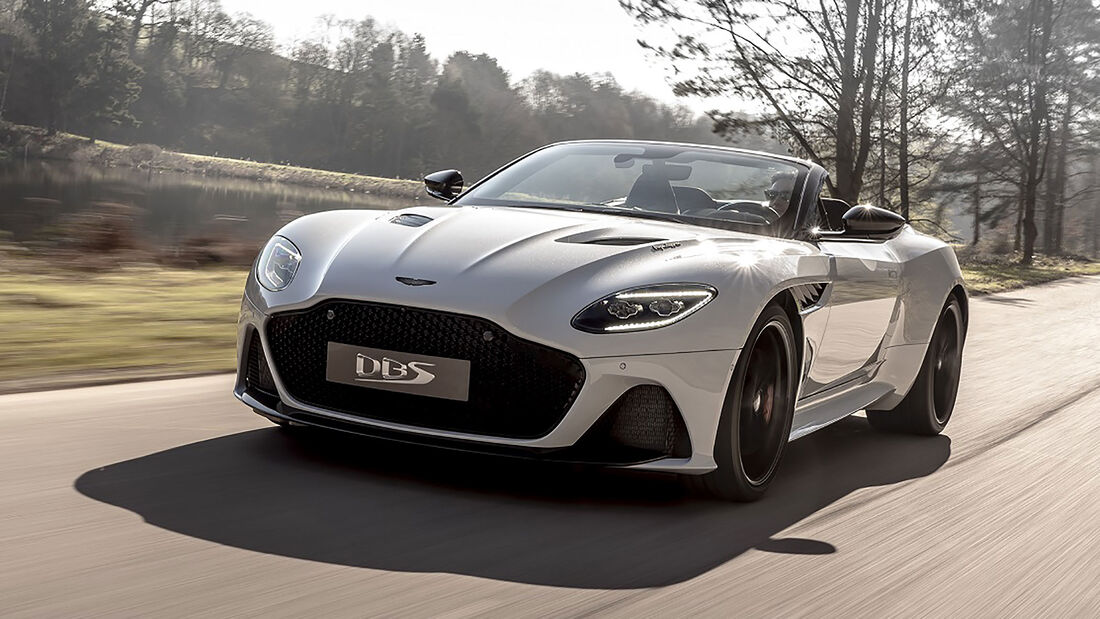

In [5]:
# Load sample image
img_path = '../assets/test_data/AM_DB9.jpg'
# Load image to perform classification
img = image.load_img(img_path)
img

In [14]:
# Preprocess image
img_size_RN = (224, 224)
# Preprocess image
img = image.load_img(img_path, target_size=img_size_RN)
x_RN = image.img_to_array(img)
x_RN = np.expand_dims(x_RN, axis=0)
x_RN = preprocess_input(x_RN)

In [15]:
img_size_Xc = (299, 299)
img = image.load_img(img_path, target_size=img_size_Xc)
x_Xc = image.img_to_array(img)
x_Xc = np.expand_dims(x_Xc, axis=0)
x_Xc = preprocess_input(x_Xc)

In [17]:
# Infer image lable
model_name = 'xception_classification'
url = 'http://localhost:8501/v1/models/' + model_name + ':predict'
payload = {
    "instances": x_Xc.tolist()
}
response = requests.post(url, json=payload)
preds = np.array(response.json()['predictions'])

print('Predicted:', decode_predictions(preds, top=3)[0])
#response.json()

Predicted: [('n03657121', 'lens_cap', 0.306350857), ('n03763968', 'military_uniform', 0.239056379), ('n03814906', 'necklace', 0.160401523)]


In [18]:
# Infer image lable
model_name = 'ResNet50V2_classification'
url = 'http://localhost:8501/v1/models/' + model_name + ':predict'
payload = {
    "instances": x_Xc.tolist()
}
response = requests.post(url, json=payload)
preds = np.array(response.json()['predictions'])

print('Predicted:', decode_predictions(preds, top=3)[0])
#response.json()

Predicted: [('n02356798', 'fox_squirrel', 1.0), ('n02089973', 'English_foxhound', 1.6864089e-24), ('n15075141', 'toilet_tissue', 0.0)]
